In [2]:
#importing dependencies
from visjobs.datas import get_data
from visjobs.visualize import draw_map
import xarray as xr

#getting the data using pick_data function of visjobs.datas
#hour=06 means the 06Z run of the model 
#here latest=True means the latest output with 06Z run
#model is chosen GFS can be changed to NAM also
#if hourly=False the GFS model will be 3 hourly -->only valid for GFS not for NAM
data = get_data.pick_data( hour='06',latest=True,model='GFS', hourly=False)

#here using xarray dataset,  we are dedicating the interval of desired latitude and longitude
# [0:2:1,:,:] means --> ['time', 'lon','lat']
temp = data['tmpprs'][0:2:1,:,:].sel(lat = slice(35,45),lon=slice(230,240), lev=slice(1000,500)) - 273.15
rh = data['rhprs'][0:2:1,:,:].sel(lat = slice(35,45),lon=slice(230, 240), lev=slice(1000,500))
time = len(data['time'][0:2:1])



Temp_rh_cross | 1.map | Done--19:11:36.094832
TEMP_PRESS_TURKEY | TOTAL JOB DONE | Duration: 0:00:08.221062


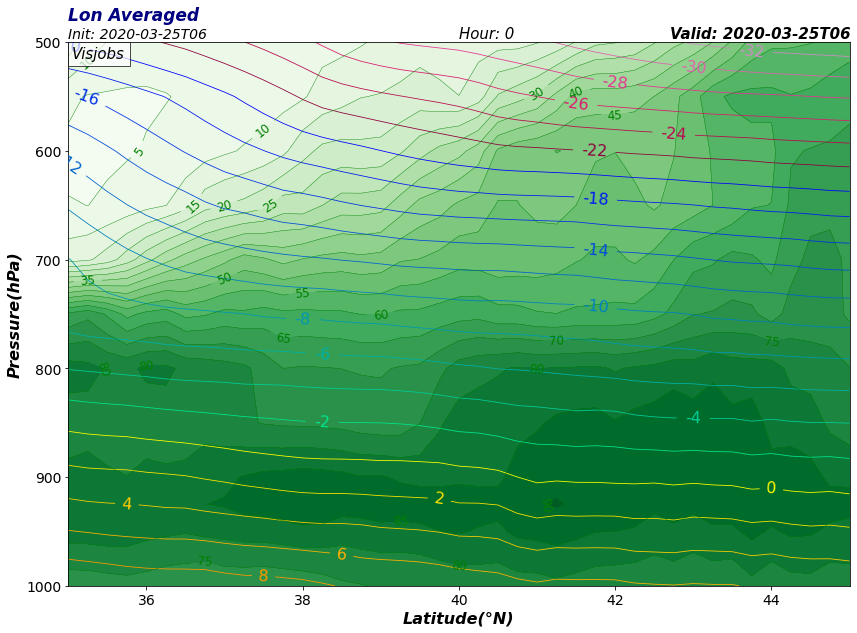

In [3]:
#choosing the desired plot size
from pylab import rcParams
rcParams['figure.figsize'] = 30,26

#here we are plotting the temp_rh cross section map
#lon_ave is questioned if the user expects to have mean of longitude or Latitude
#if lon_ave=True, the longitude average is taken and cross section map is created.
#if breaking=True only a single map will be created even if a bunch of time is introduced 
#if world_map=True, second axis which shows a cross section map will be ploted
#using width,height,left etc. parameters one can change the position of the world_map
#if title_on=False the title will be missed
#if the title_on=True, title will be plotted and one can change it posisition arguments using
#tl1,tl2,tl3 etc. parameters.
draw_map.temp_rh_cross_aegean(time, temp, rh, lon_ave=True, 
                          save_where=r'Pictures\temp_rh_cross_aegean{}.png', breaking=True, world_map=False, title_on=True
                             ,owner_name='Visjobs')